# The Battle of Neighbourhoods (Crimes Correlations)

### Problem definition

This Notebook examines and analyses correlations among different categories of crime in Surrey County.

#### Importing necessary Libraries

In [1]:
# Import necessary Libraries

import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


# Data acquisition

In [2]:
pip install xlrd

     |████████████████████████████████| 112kB 18.5MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Data source

The data set which includes information related to the numbers and categories of crime that have been committed in each borough and ward can be found on [Surrey-i website](https://www.surreyi.gov.uk/) via this [link](https://www.surreyi.gov.uk/dataset?q=Master%20Crime%20Category%20by%20Ward%20). 

### Downloading and reading Data into a DataFrame

In [24]:
#!wget -O Master_Crime_Category_by_Ward.xls https://www.surreyi.gov.uk/download/surrey-crime-by-category-ward/83d9ce81-d251-46a1-ad36-79e70320aeb2/Master%20Crime%20Category%20by%20Ward.xls
#df = pd.read_excel('Master_Crime_Category_by_Ward.xls')


#### or

In the following, I read data containing crime records by their categories for all Wadrs in surrey county from the specified link.

In [3]:
file = 'https://www.surreyi.gov.uk/download/surrey-crime-by-category-ward/83d9ce81-d251-46a1-ad36-79e70320aeb2/Master%20Crime%20Category%20by%20Ward.xls'
df_ward_crimes = pd.read_excel(file)
# take a look at the dataset
df_ward_crimes.head()


,Month,Geocode,Borough,Ward,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
0,2018-04-01,E10000030,Surrey total,Surrey total,36,301,437,489,5692,1738,131,1224,722,202,15,87,178
1,2018-04-01,E07000207,Elmbridge,Borough total,3,54,51,49,638,195,13,143,73,15,1,12,22
2,2018-04-01,E07000208,Epsom & Ewell,Borough total,4,18,76,35,477,130,8,90,46,16,1,31,10
3,2018-04-01,E07000209,Guildford,Borough total,4,36,22,64,709,206,17,207,78,27,4,1,20
4,2018-04-01,E07000210,Mole Valley,Borough total,4,20,31,36,357,105,6,54,48,21,1,7,14


Checking the size of DataFrame

In [4]:
df_ward_crimes.shape

(3924, 17)

In the following, I read data containing all Wadrs, their postcode and Geographical coordinates.

# Data preparation

#### Cleaning

The df_ward_crimes DataFrame contains rows which are not needed in our study, so I drop them.

In [5]:
rslt_df = df_ward_crimes.loc[lambda df_ward_crimes: (df_ward_crimes['Ward'] != 'Surrey total') & (df_ward_crimes['Ward'] != 'Borough total')] 
rslt_df.head()

,Month,Geocode,Borough,Ward,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
12,2018-04-01,E05007251,EL,Claygate,0,1,0,4,26,12,1,4,3,0,0,0,0
13,2018-04-01,E05007253,EL,Cobham Fairmile,1,2,2,2,26,10,0,4,3,0,0,1,0
14,2018-04-01,E05007252,EL,Cobham and Downside,0,0,1,1,43,9,0,24,3,3,1,0,1
15,2018-04-01,E05007254,EL,Esher,2,5,2,4,28,7,0,4,4,0,0,0,0
16,2018-04-01,E05007255,EL,Hersham North,0,8,0,2,37,14,0,5,6,0,0,0,2


In [6]:
# reset index, because we droped  a couple of rows
rslt_df.reset_index(drop=True, inplace=True)   

In [7]:
#Checking the size of DataFrame
rslt_df.shape

(3708, 17)

In our data, the name of Boroughs have been provided by their abbreviation; for clarity, I replace them with their full name using a dictionary

In [8]:
Boro_dic={'EL':'Elmbridge','EP':'Epsom & Ewell','GD':'Guildford','MV':'Mole Valley', 'RB':'Reigate & Banstead','RM':'Runnymede','SL':'Spelthorne', 'SH':'Surrey Heath','TD':'Tandridge','WV':'Waverley','WK':'Woking'}
rslt_df.replace( to_replace=Boro_dic, value=None, inplace=True) # give full name to Boroughs utilising above dictinary    
rslt_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4278: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,Month,Geocode,Borough,Ward,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
0,2018-04-01,E05007251,Elmbridge,Claygate,0,1,0,4,26,12,1,4,3,0,0,0,0
1,2018-04-01,E05007253,Elmbridge,Cobham Fairmile,1,2,2,2,26,10,0,4,3,0,0,1,0
2,2018-04-01,E05007252,Elmbridge,Cobham and Downside,0,0,1,1,43,9,0,24,3,3,1,0,1
3,2018-04-01,E05007254,Elmbridge,Esher,2,5,2,4,28,7,0,4,4,0,0,0,0
4,2018-04-01,E05007255,Elmbridge,Hersham North,0,8,0,2,37,14,0,5,6,0,0,0,2


Remove columns (i.e., 'Month' and 'Geocode') which is unnecessary our analysis.  

In [9]:
rslt_df.drop(columns=['Month','Geocode'], inplace=True, )  #remove unrequired column

rslt_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Borough,Ward,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
0,Elmbridge,Claygate,0,1,0,4,26,12,1,4,3,0,0,0,0
1,Elmbridge,Cobham Fairmile,1,2,2,2,26,10,0,4,3,0,0,1,0
2,Elmbridge,Cobham and Downside,0,0,1,1,43,9,0,24,3,3,1,0,1
3,Elmbridge,Esher,2,5,2,4,28,7,0,4,4,0,0,0,0
4,Elmbridge,Hersham North,0,8,0,2,37,14,0,5,6,0,0,0,2


##### Check for null values

In [10]:
rslt_df.isnull().values.any()

False

In [46]:
rslt_df.dtypes

Borough                    object
Ward                       object
ROBBERY                     int64
DOMESTIC_BURGLARY           int64
VEHICLE_CRIME               int64
VIOLENCE_WITH_INJURY        int64
TNO                         int64
VIOLENCE_WITHOUT_INJURY     int64
NON_DOMESTIC_BURGLARY       int64
THEFT_HANDLING              int64
CRIMINAL_DAMAGE             int64
DRUG_OFFENCES               int64
FRAUD_FORGERY               int64
VEHICLE_INTERFERENCE        int64
OTHER_OFFENCES              int64
dtype: object

#### Descriptive Statistical Analysis

In [11]:
rslt_df.describe()

,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
count,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,0.097357,1.759978,1.659924,2.203074,24.677454,7.516451,0.510248,5.565804,3.015102,0.500000,0.057174,0.281553,0.774002
std,0.351441,1.761806,1.967785,2.479051,19.022258,6.384201,0.922197,7.310910,2.797796,1.808397,0.270817,0.712155,1.324645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,2.000000,20.000000,6.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,3.000000,31.000000,10.000000,1.000000,7.000000,4.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,11.000000,20.000000,22.000000,162.000000,50.000000,10.000000,71.000000,23.000000,91.000000,4.000000,9.000000,17.000000


#### Analysing crimes' categories and their correlations using Visualisation

In [12]:
rslt_df.corr()

,ROBBERY,DOMESTIC_BURGLARY,VEHICLE_CRIME,VIOLENCE_WITH_INJURY,TNO,VIOLENCE_WITHOUT_INJURY,NON_DOMESTIC_BURGLARY,THEFT_HANDLING,CRIMINAL_DAMAGE,DRUG_OFFENCES,FRAUD_FORGERY,VEHICLE_INTERFERENCE,OTHER_OFFENCES
ROBBERY,1.000000,0.046029,0.078314,0.176701,0.249473,0.196526,0.068918,0.198512,0.169700,0.055391,0.052039,0.009010,0.120288
DOMESTIC_BURGLARY,0.046029,1.000000,0.156893,0.131108,0.273917,0.157035,0.081708,0.129756,0.161579,0.026332,0.021419,0.096232,0.078238
VEHICLE_CRIME,0.078314,0.156893,1.000000,0.208369,0.376099,0.236681,0.133257,0.195734,0.226621,0.056135,0.064842,0.361518,0.113738
VIOLENCE_WITH_INJURY,0.176701,0.131108,0.208369,1.000000,0.719729,0.643024,0.188060,0.490875,0.481797,0.178321,0.141415,0.054700,0.360887
TNO,0.249473,0.273917,0.376099,0.719729,1.000000,0.871843,0.341789,0.838296,0.684451,0.346283,0.243411,0.150339,0.448577
VIOLENCE_WITHOUT_INJURY,0.196526,0.157035,0.236681,0.643024,0.871843,1.000000,0.214657,0.606632,0.588267,0.239953,0.189338,0.050779,0.365806
NON_DOMESTIC_BURGLARY,0.068918,0.081708,0.133257,0.188060,0.341789,0.214657,1.000000,0.306666,0.216052,0.076672,0.095945,0.029287,0.102373
THEFT_HANDLING,0.198512,0.129756,0.195734,0.490875,0.838296,0.606632,0.306666,1.000000,0.430062,0.234175,0.239803,0.069133,0.319949
CRIMINAL_DAMAGE,0.169700,0.161579,0.226621,0.481797,0.684451,0.588267,0.216052,0.430062,1.000000,0.163577,0.114925,0.069622,0.280865
DRUG_OFFENCES,0.055391,0.026332,0.056135,0.178321,0.346283,0.239953,0.076672,0.234175,0.163577,1.000000,0.094190,-0.003142,0.152364


In [13]:
#The following categories are most correlated 
rslt_df[['CRIMINAL_DAMAGE', 'VIOLENCE_WITH_INJURY', 'VIOLENCE_WITHOUT_INJURY', 'THEFT_HANDLING']].corr()

,CRIMINAL_DAMAGE,VIOLENCE_WITH_INJURY,VIOLENCE_WITHOUT_INJURY,THEFT_HANDLING
CRIMINAL_DAMAGE,1.000000,0.481797,0.588267,0.430062
VIOLENCE_WITH_INJURY,0.481797,1.000000,0.643024,0.490875
VIOLENCE_WITHOUT_INJURY,0.588267,0.643024,1.000000,0.606632
THEFT_HANDLING,0.430062,0.490875,0.606632,1.000000


(0, 23.124400588939647)

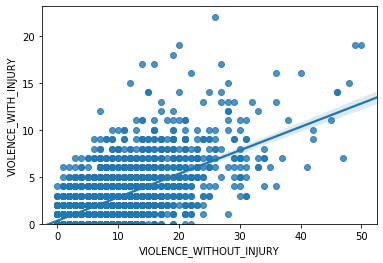

In [57]:
# VIOLENCE_WITH_INJURY as potential predictor variable of VIOLENCE_WITH_INJURY
sns.regplot(x="VIOLENCE_WITHOUT_INJURY", y="VIOLENCE_WITH_INJURY", data=rslt_df)
plt.ylim(0,)

(0, 23.10367786984647)

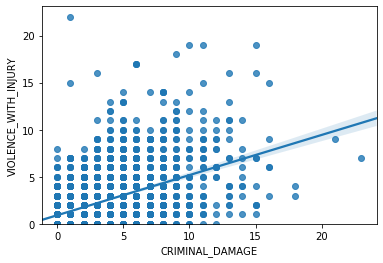

In [14]:
# CRIMINAL_DAMAGE as potential predictor variable of VIOLENCE_WITH_INJURY
sns.regplot(x="CRIMINAL_DAMAGE", y="VIOLENCE_WITH_INJURY", data=rslt_df)
plt.ylim(0,)

(0, 23.10367786984647)

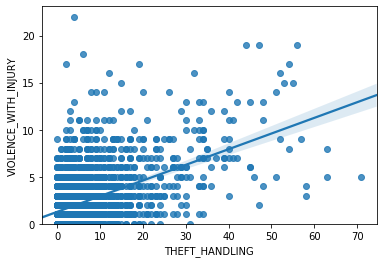

In [15]:
# THEFT_HANDLING as potential predictor variable of VIOLENCE_WITH_INJURY
sns.regplot(x="THEFT_HANDLING", y="VIOLENCE_WITH_INJURY", data=rslt_df)
plt.ylim(0,)

#### Calculating Pearson Correlation and P value
The Pearson Correlation measures the linear dependence between two variables X and Y.
The P-value is the probability value that the correlation between these two variables is statistically significant.
By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [16]:
from scipy import stats

In [24]:
pearson_coef, p_value = stats.pearsonr(rslt_df['VIOLENCE_WITH_INJURY'], rslt_df['VIOLENCE_WITHOUT_INJURY'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.643024419461235  with a P-value of P = 0.0


In [18]:
pearson_coef, p_value = stats.pearsonr(rslt_df['VIOLENCE_WITH_INJURY'], rslt_df['CRIMINAL_DAMAGE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.48179690563244726  with a P-value of P = 7.484136799848034e-215


In [19]:
pearson_coef, p_value = stats.pearsonr(rslt_df['VIOLENCE_WITH_INJURY'], rslt_df['THEFT_HANDLING'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.49087456253497885  with a P-value of P = 3.621046276480036e-224


In [22]:
#Check correlation between VEHICLE_INTERFERENCE and VIOLENCE_WITH_INJURY
pearson_coef, p_value = stats.pearsonr(rslt_df['VIOLENCE_WITH_INJURY'], rslt_df['VEHICLE_INTERFERENCE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.0547001934578298  with a P-value of P = 0.0008614689321216598


## Applying Multiple Linear Regression model

We are going to create a model in order to predict the number of VIOLENCE_WITH_INJURY in different wards using other crime categories,  namely, CRIMINAL_DAMAGE, VIOLENCE_WITHOUT_INJURY, THEFT_HANDLING

In [60]:
#load the modules for linear regression
from sklearn.linear_model import LinearRegression

In [61]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Preparing Training and Testing data

In [62]:
y_data = rslt_df['VIOLENCE_WITH_INJURY']

In [63]:
x_data=rslt_df.drop('VIOLENCE_WITH_INJURY',axis=1)

Now we randomly split our data into training and testing data using the function train_test_split.

In [64]:
#load the modules for spliting dataset
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 557
number of training samples: 3151


In [79]:
#train the model with training data
lm.fit(x_train[['VIOLENCE_WITHOUT_INJURY', 'CRIMINAL_DAMAGE', 'THEFT_HANDLING']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
#he value of the intercept
lm.intercept_

0.13680852849837732

In [72]:
#the values of the coefficients
lm.coef_

array([0.18839764, 0.13469491, 0.04939527])

In [66]:
#Predict using test data
y_hat_test=lm.predict(x_test[['VIOLENCE_WITHOUT_INJURY', 'CRIMINAL_DAMAGE', 'THEFT_HANDLING']])
y_hat_test[0:5]

array([11.23871141,  0.60377942,  3.72611566,  2.44266804,  3.82952133])

In [67]:
# check the accuracy of the model
lm.score(x_test[['VIOLENCE_WITHOUT_INJURY', 'CRIMINAL_DAMAGE', 'THEFT_HANDLING']],y_test)

0.3388407054438053

Since the result is not very good I use Cross-validation Score to see if we can get better score. 

## Cross-validation Score

In [54]:
#load required modules
from sklearn.model_selection import cross_val_score

In [68]:
Rcross = cross_val_score(lm, x_data[['VIOLENCE_WITHOUT_INJURY', 'CRIMINAL_DAMAGE', 'THEFT_HANDLING']], y_data, cv=4)

In [69]:
Rcross

array([0.46733964, 0.4756078 , 0.39417028, 0.42999745])

In [70]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.44177879533070186 and the standard deviation is 0.03241577359302499


## Model Evaluation using Visualisation

In [73]:
Y_hat = lm.predict(x_data[['VIOLENCE_WITHOUT_INJURY', 'CRIMINAL_DAMAGE', 'THEFT_HANDLING']])

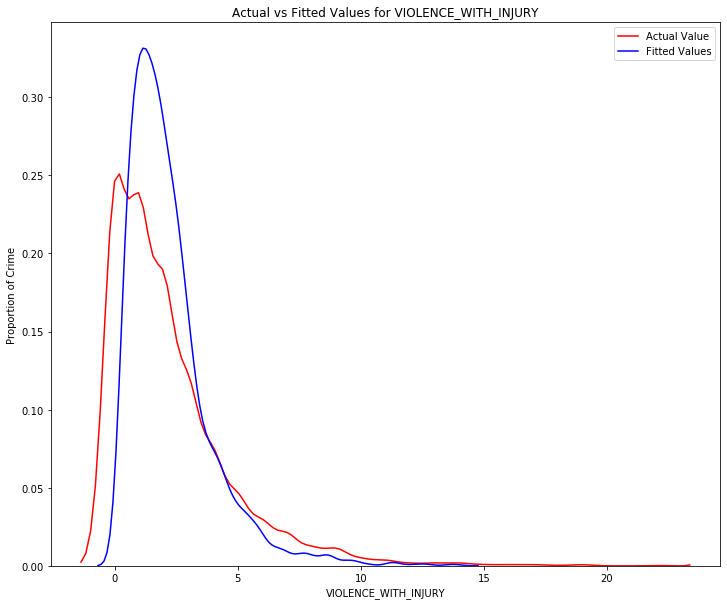

In [74]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(rslt_df['VIOLENCE_WITH_INJURY'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for VIOLENCE_WITH_INJURY')
plt.xlabel('VIOLENCE_WITH_INJURY')
plt.ylabel('Proportion of Crime')

plt.show()
plt.close()

The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

In [76]:
from sklearn.metrics import mean_squared_error

In [77]:
print('The R-square is: ', lm.score(predictor_var, rslt_df['VIOLENCE_WITH_INJURY']))

The R-square is:  0.44200442288096314


In [78]:
print('The mean square error of VIOLENCE_WITH_INJURY and predicted value using multifit is: ', \
      mean_squared_error(rslt_df['VIOLENCE_WITH_INJURY'], Y_hat))

The mean square error of VIOLENCE_WITH_INJURY and predicted value using multifit is:  3.428344832918767
